# Exploratory data analysis of the Energy Efficiency data set

## Authors of this project

Mehwish Nabi, Yaou Hu, Nate Puangpanbut at the MDS program of University of British Columbia

## Summary of the data set

The data set used in this exploratory data analysis is retrieved from "http://archive.ics.uci.edu/ml/datasets/Energy+efficiency#". It was contributed by Angeliki Xifara (angxifara@gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis@gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK). It contained 768 instances and was donated on 2012-11-30. It has no missing values. It has a total of 10 variables, with 8 of them being attributes(features) and two responses. The authors suggested that this data set aims to use the eight features to predict the two responses. These variables are shown in the table below:

**Table 1. Variable description of the data set**
| Variable name in data set| Description |
| --- | --- |
| X1 | Relative Compactness |
| X2 | Surface Area |
| X3 | Wall Area |
| X4 | Roof Area |
| X5 | Overall Height |
| X6 | Orientation |
| X7 | Glazing Area |
| X8 | Glazing Area Distribution |
| y1 | Heating Load |
| y2 | Cooling Load |

## Research question

**Given building-related features such as Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', and 'Glazing Area Distribution', how accurately can we predict the 'Heating Load' of the building?** 

**What is the contribution level of each feature associated to the 'Heating Load' of the building?**

## Importance of the research question

There are growing concerns about energy waste and its detrimental environmental impact. This project focuses on the energy performance of residential buildings. Concentrating on eight building-related features (i.e., Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', and 'Glazing Area Distribution'), this project aims to predict the 'Heating Load' of the building and examine the contribution level of each feature associated to the 'Heating Load' of the building.

The answers to the above questions are important and meaningful to residents, residential builders, and society. With the findings of our project, home-owners and potential home buyers are provided with more information regarding the energy efficiency of their residential options to make wiser home choices; residential builders could build more energy-efficient and environmentally friendly residential building, which indirectly contribute to the whole society in terms of energy preservation and environment protection.

## Partition the data set into training and test sub-data sets

The data set was divided into train and test sets, with 70% train data and 30% test data.

**Table 2. Partition of data**
| Number of cases| Sub data set |
| --- | --- |
| 537 | Train set |
| 231 | Test set |

## Exploratory data analysis with the train set

The exploratory data analysis was conducted through the following steps:

1. Load the necessary packages and split the data into train and test sets. NaN data were dropped;

2. EDA was performed on the train set. We checked the data types and found no missing values. Then we checked the data distribution through bar plots, value_counts, correlations, and pairwise scatter plots. Through the EDA, we could identify that all the variables are numeric. We kept all the features for subsequent analysis.

3. Based on the above analysis, we aim to do a supervised machine learning model with ‘Heating Load’ as the target.


In [1]:
# load the packages
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('mimetype')
from sklearn.model_selection import train_test_split

In [2]:
# read in data set
# rename the attributes
# source:http://archive.ics.uci.edu/ml/datasets/Energy+efficiency#
energy_data = pd.read_csv('https://raw.githubusercontent.com/UBC-MDS/energy_efficiency_analysis/main/data/processed/energy_effeciency_processed.csv').dropna()
energy_data = energy_data.rename(columns = {'X1':'Relative Compactness',
                                            'X2':'Surface Area',
                                            'X3':'Wall Area',
                                            'X4':'Roof Area',
                                            'X5':'Overall Height',
                                            'X6':'Orientation',
                                            'X7':'Glazing Area',
                                            'X8':'Glazing Area Distribution',
                                            'Y1':'Heating Load',
                                            'Y2':'Cooling Load'})
train_df, test_df = train_test_split(energy_data, test_size = 0.3, random_state = 4)

In [3]:
# check the data types and see if there are missing values
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 262 to 122
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       537 non-null    float64
 1   Surface Area               537 non-null    float64
 2   Wall Area                  537 non-null    float64
 3   Roof Area                  537 non-null    float64
 4   Overall Height             537 non-null    float64
 5   Orientation                537 non-null    float64
 6   Glazing Area               537 non-null    float64
 7   Glazing Area Distribution  537 non-null    float64
 8   Heating Load               537 non-null    float64
 9   Cooling Load               537 non-null    float64
dtypes: float64(10)
memory usage: 46.1 KB


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
262,0.76,661.5,416.5,122.50,7.0,4.0,0.10,5.0,32.46,33.64
619,0.64,784.0,343.0,220.50,3.5,5.0,0.40,2.0,19.12,21.93
275,0.69,735.0,294.0,220.50,3.5,5.0,0.10,5.0,11.16,14.39
338,0.98,514.5,294.0,110.25,7.0,4.0,0.25,2.0,28.18,30.18
177,0.69,735.0,294.0,220.50,3.5,3.0,0.10,3.0,11.16,14.27


In [4]:
train_df.describe(include="number")

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.765866,670.533520,319.001862,175.765829,5.279330,3.521415,0.233892,2.828678,22.421750,24.709423
std,0.107296,89.237801,42.682258,45.300412,1.751386,1.114695,0.132873,1.575369,10.128379,9.599911
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.660000,588.000000,294.000000,122.500000,3.500000,3.000000,0.100000,2.000000,13.000000,15.730000
50%,0.760000,661.500000,318.500000,147.000000,7.000000,4.000000,0.250000,3.000000,19.200000,22.720000
75%,0.860000,759.500000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,31.530000,33.040000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


In [5]:
train_df['Relative Compactness'].value_counts()

0.90    49
0.79    48
0.98    47
0.62    47
0.69    46
0.82    46
0.66    45
0.64    43
0.76    42
0.74    42
0.86    41
0.71    41
Name: Relative Compactness, dtype: int64

In [6]:
train_df['Surface Area'].value_counts()

563.5    49
637.0    48
514.5    47
808.5    47
735.0    46
612.5    46
759.5    45
784.0    43
661.5    42
686.0    42
588.0    41
710.5    41
Name: Surface Area, dtype: int64

In [7]:
train_df['Roof Area'].value_counts()

220.50    264
147.00    135
122.50     91
110.25     47
Name: Roof Area, dtype: int64

In [8]:
train_df['Overall Height'].value_counts()

7.0    273
3.5    264
Name: Overall Height, dtype: int64

In [9]:
train_df['Orientation'].value_counts()

5.0    137
3.0    136
4.0    135
2.0    129
Name: Orientation, dtype: int64

In [10]:
train_df['Glazing Area'].value_counts()

0.25    176
0.40    164
0.10    160
0.00     37
Name: Glazing Area, dtype: int64

In [11]:
train_df['Glazing Area Distribution'].value_counts()

5.0    105
4.0    104
2.0    101
1.0     97
3.0     93
0.0     37
Name: Glazing Area Distribution, dtype: int64

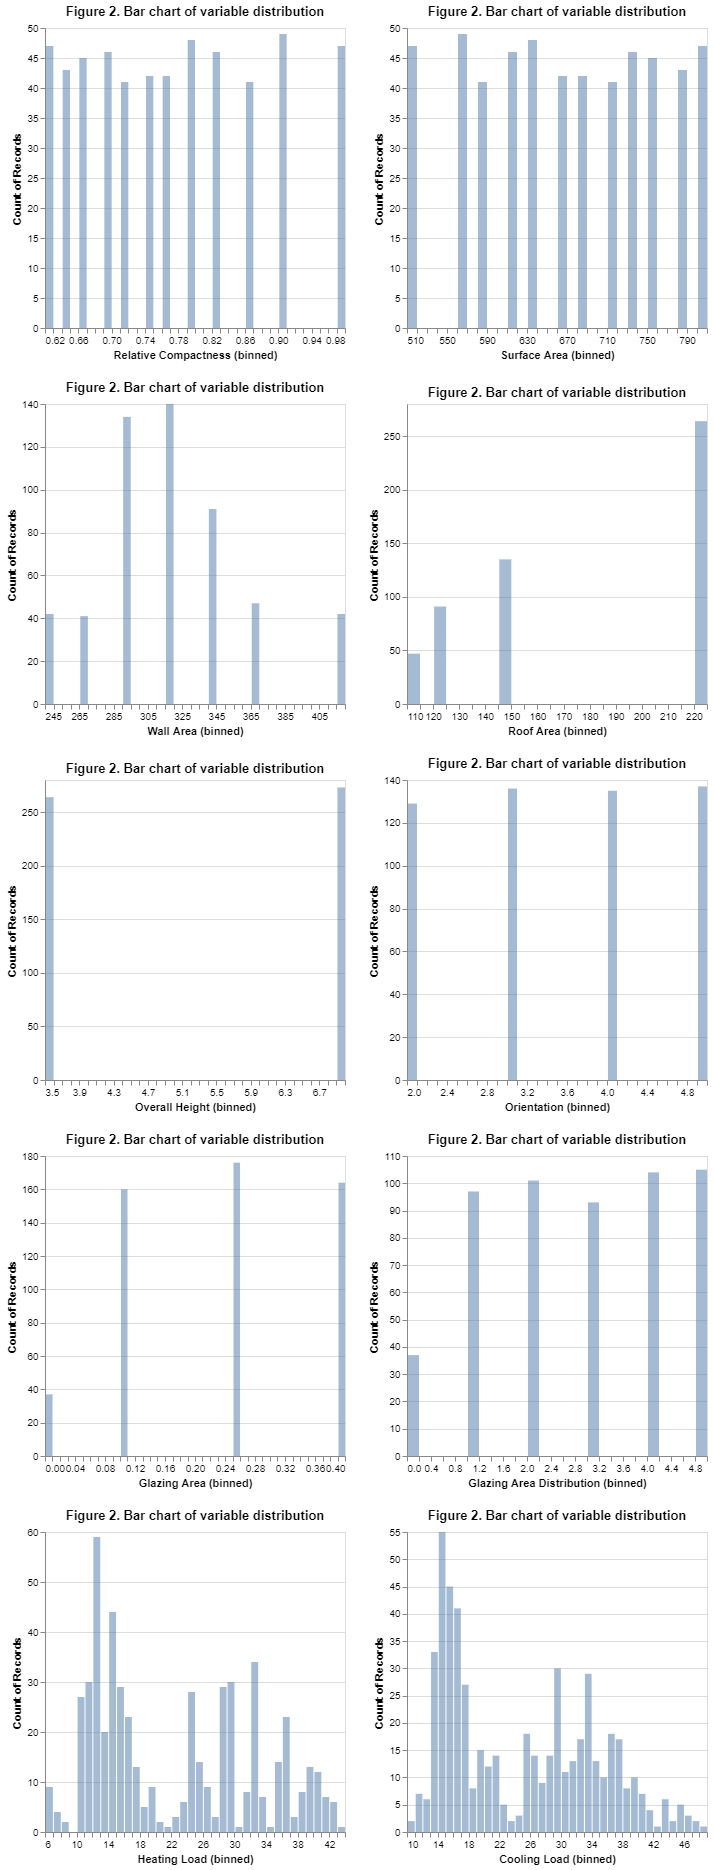

In [12]:
# check the distribution of all variables
column_list = train_df.columns.tolist()
feats = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']

distri = alt.Chart(train_df, 
                         title = 'Figure 2. Bar chart of variable distribution'
                        ).mark_bar(opacity = 0.5).encode(
    alt.X (alt.repeat(),
           type = 'quantitative',
          bin = alt.Bin(maxbins = 45)),
    alt.Y('count()', stack = None),
    tooltip = 'count()'
    ).properties(width = 300,
            height = 300).repeat(
    repeat = column_list,
    columns = 2)
distri

In [17]:
# correlation matrix
energy_data.corr('spearman').style.background_gradient()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000,-1.000000,-0.255805,-0.870886,0.869048,0.000000,0.000000,0.000000,0.622135,0.651019
Surface Area,-1.000000,1.000000,0.255805,0.870886,-0.869048,0.000000,0.000000,0.000000,-0.622135,-0.651019
Wall Area,-0.255805,0.255805,1.000000,-0.193457,0.220763,0.000000,0.000000,0.000000,0.471458,0.415991
Roof Area,-0.870886,0.870886,-0.193457,1.000000,-0.937043,0.000000,0.000000,0.000000,-0.804027,-0.803175
Overall Height,0.869048,-0.869048,0.220763,-0.937043,1.000000,0.000000,0.000000,0.000000,0.861283,0.864876
Orientation,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.004163,0.017606
Glazing Area,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.187592,0.322860,0.288904
Glazing Area Distribution,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187592,1.000000,0.068343,0.046477
Heating Load,0.622135,-0.622135,0.471458,-0.804027,0.861283,-0.004163,0.322860,0.068343,1.000000,0.972689
Cooling Load,0.651019,-0.651019,0.415991,-0.803175,0.864876,0.017606,0.288904,0.046477,0.972689,1.000000


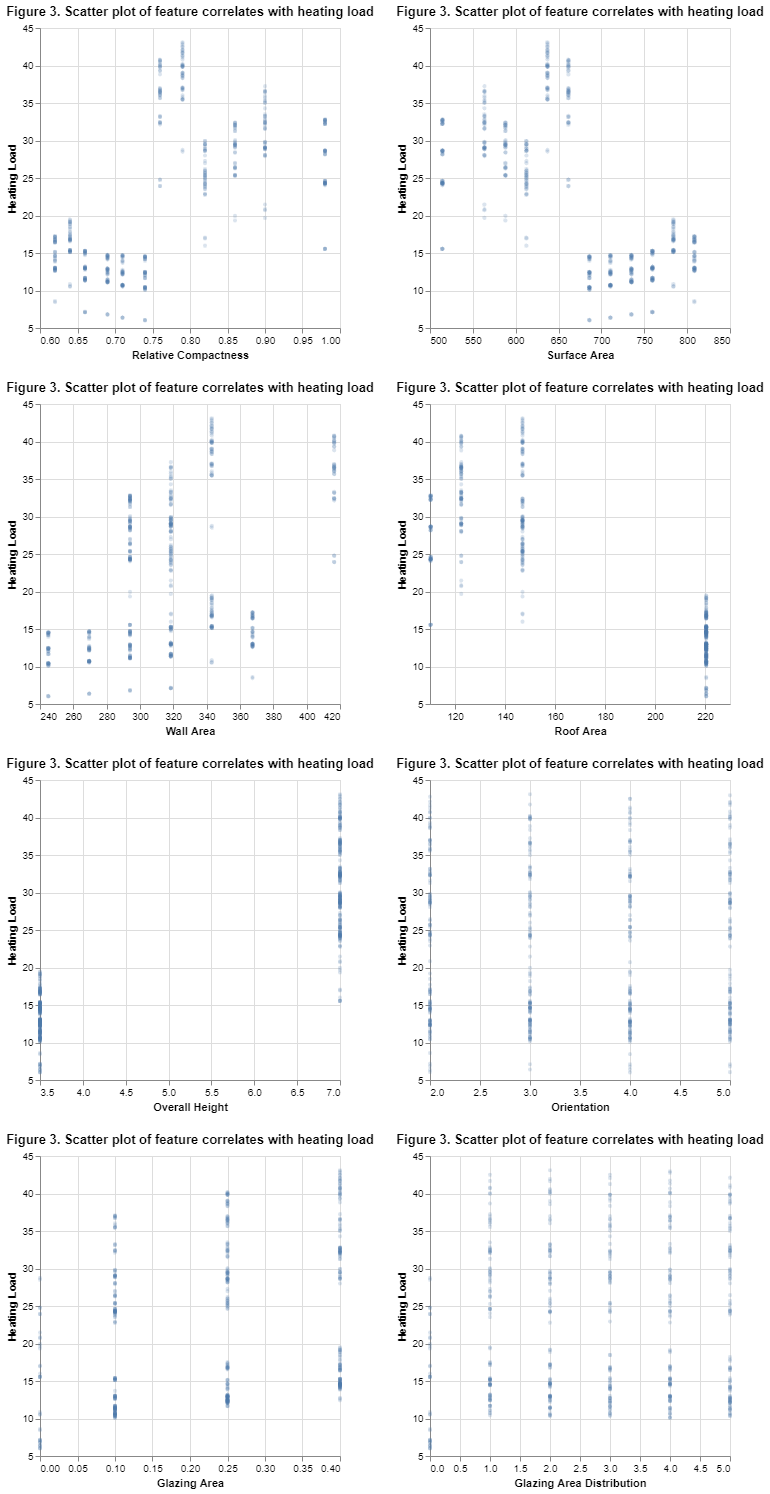

In [14]:
# pairwsie scatter plots

scatter1 = alt.Chart(train_df,
                    title = 'Figure 3. Scatter plot of feature correlates with heating load').mark_point(opacity = 0.2,
                                       size = 5).encode(
    alt.X (alt.repeat(),
           type = 'quantitative',
           scale = alt.Scale(zero = False)),
    alt.Y('Heating Load',
          scale = alt.Scale(zero = False))
    ).properties(
    width = 300,
    height = 300
    ).repeat(
    repeat = feats,
        columns = 2
    )
scatter1

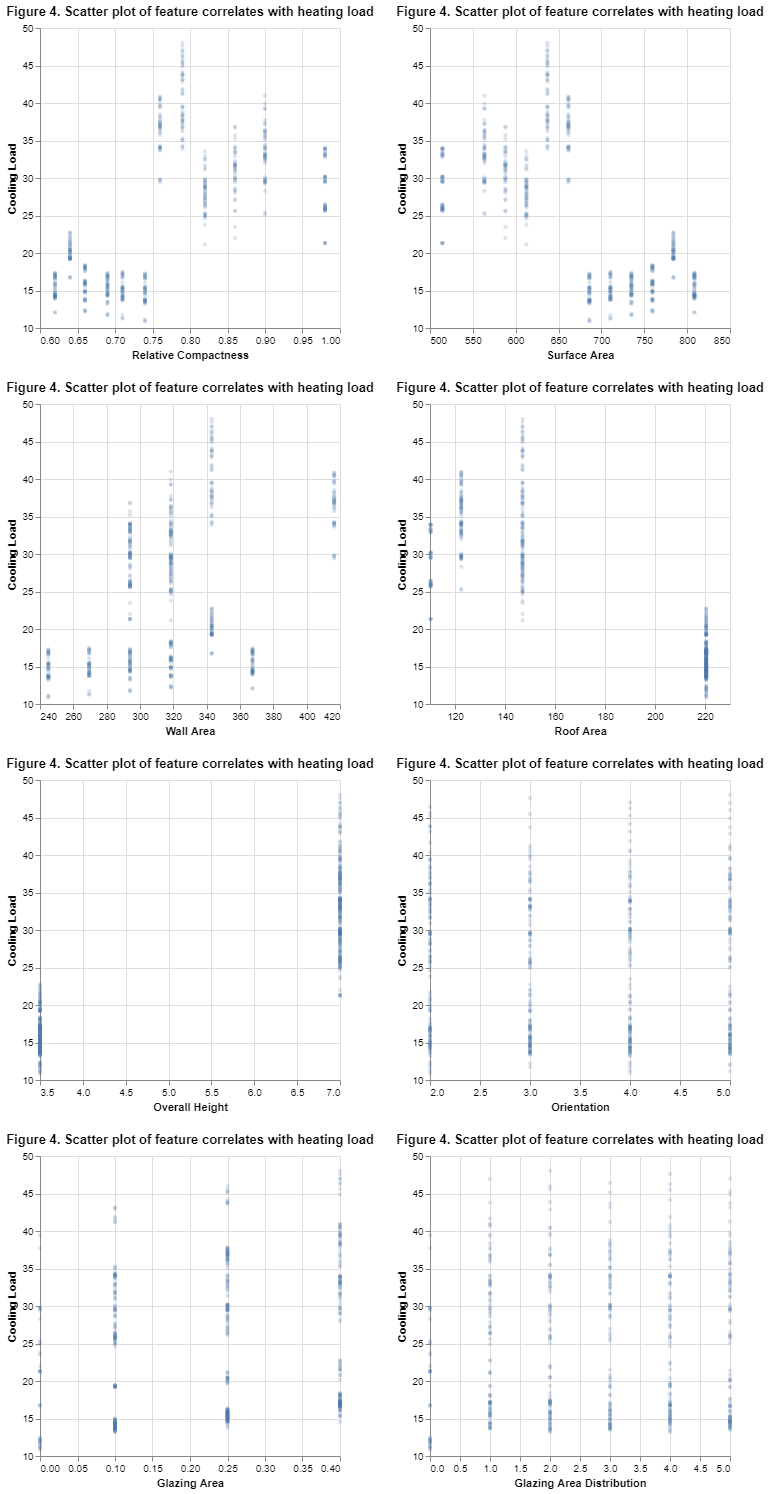

In [15]:
scatter2 = alt.Chart(train_df,
                    title = 'Figure 4. Scatter plot of feature correlates with heating load').mark_point(opacity = 0.2,
                                       size = 5).encode(
    alt.X (alt.repeat(),
           type = 'quantitative',
           scale = alt.Scale(zero = False)),
    alt.Y('Cooling Load',
          scale = alt.Scale(zero = False))
    ).properties(
    width = 300,
    height = 300
    ).repeat(
    repeat = feats,
        columns = 2
    )
scatter2

## References

Harris, Charles R., K. Jarrod Millman, Stéfan J. van der Walt, Ralf Gommers, Pauli Virtanen, David Cournapeau, Eric Wieser, et al. 2020. “Array Programming with NumPy.” Nature 585 (7825): 357–62. https://doi.org/10.1038/s41586-020-2649-2.

Pedregosa, F., G. Varoquaux, A. Gramfort, V. Michel, B. Thirion, O. Grisel, M. Blondel, et al. 2011. “Scikit-Learn: Machine Learning in Python.” Journal of Machine Learning Research 12: 2825–30.

The Pandas Development Team. 2020. Pandas-Dev/Pandas: Pandas (version latest). Zenodo. https://doi.org/10.5281/zenodo.3509134.

VanderPlas, Jacob, Brian Granger, Jeffrey Heer, Dominik Moritz, Kanit Wongsuphasawat, Arvind Satyanarayan, Eitan Lees, Ilia Timofeev, Ben Welsh, and Scott Sievert. 2018. “Altair: Interactive Statistical Visualizations for Python.” Journal of Open Source Software 3 (32): 1057.